# butchi number

from butchi-number.nb

In [1]:
butchiNumber[0] := butchiNumber[{{0}}]
butchiNumber[x_?NumberQ] := normalize[butchiNumber[{{x}}]]

In [3]:
butchiNumberForm[butchiNumber[li_]] := Grid[Reverse[li, {1, 2}], Dividers -> -1 -> True]

In [4]:
Format[butchiNumber[li_]] := butchiNumberForm[butchiNumber[li]]

In [5]:
listToPolynomial[li_, var_] := FromDigits[Reverse[li], var]

In [6]:
butchiNumberToList[x_butchiNumber] := First[x]

In [7]:
butchiNumberToPolynomial[x_butchiNumber, var1_, var2_] := 
    listToPolynomial[
        Map[listToPolynomial[#, var1] &, butchiNumberToList[x], 1], var2
    ]

In [8]:
normalize[x_butchiNumber, max_: 99999] := 
   Module[{p, q}, 
      butchiNumber[
         CoefficientList[
            NestWhile[
               Expand[
                  ((# - PolynomialMod[#, 2]) / 2) * (p + q) + PolynomialMod[#, 2]
               ] &,
               butchiNumberToPolynomial[x, p, q],
               UnsameQ,
               2,
               max
            ],
         {q, p}]
      ]
   ]

In [9]:
(*
increment[x_butchiNumber] :=
   If[
      Extract[butchiNumberToList[x], {1, 1}] == 0, 
      butchiNumber[ReplacePart[butchiNumberToList[x], {1, 1} -> 1]], 
      Module[{li, pp = {2, 1}, qq = {1, 2}},
         li = ReplacePart[
            PadRight[#, Dimensions[#] + 1] &[
            butchiNumberToList[x]], {1, 1} -> 0
         ];
         While[
            pp != qq,
            If[li[[Sequence @@ pp]] == 1,
               li[[Sequence @@ pp]] = 0; pp[[1]]++,
               li[[Sequence @@ pp]] = 1; pp[[2]]++
            ];
            If[li[[Sequence @@ qq]] == 1,
               li[[Sequence @@ qq]] = 0; qq[[2]]++,
               li[[Sequence @@ qq]] = 1; qq[[1]]++
            ]
         ];

         Return[
            butchiNumber[
               Transpose[Transpose[li
               /. {a__, {0 ..}} -> {a}]
               /. {a__, {0 ..}} -> {a}]
            ]
         ]
      ]
   ]
*)

In [16]:
construct[op_, x__butchiNumber] := 
    Module[{p, q}, 
        normalize[butchiNumber[CoefficientList[
            Apply[
                op, 
                Table[butchiNumberToPolynomial[bn, p, q], {bn, {x}}]
            ],
            {q, p}
        ]]]
    ]

construct[op_, x_?NumberQ, y__butchiNumber] := 
    Module[{p, q}, 
        normalize[butchiNumber[CoefficientList[
            Construct[
                op,
                x, 
                Table[butchiNumberToPolynomial[bn, p, q], {bn, {y}}]],
            {q, p}
        ]]]
    ]

construct[op_, x_butchiNumber, y__?NumberQ] := 
    Module[{p, q}, 
        normalize[butchiNumber[CoefficientList[
            Construct[
                op,
                butchiNumberToPolynomial[x, p, q], y
            ],
            {q, p}
        ]]]
    ]

In [13]:
Unprotect[{Plus, Times, Power}];


Plus[x_Integer?Positive, y__butchiNumber] := construct[Plus, butchiNumber[{{x}}], y]

Plus[x_?NumberQ, y__butchiNumber] := 
    construct[Plus, butchiNumber[{{x}}], y]

Plus[x_butchiNumber, y__butchiNumber] := construct[Plus, x, y]


Times[x_?NumberQ, y__butchiNumber] := 
    construct[Times, butchiNumber[{{x}}], y]

Times[x_butchiNumber, y__butchiNumber] := construct[Times, x, y]


Power[x_butchiNumber, y_] := construct[Power, x, y]


Protect[{Plus, Times, Power}];

In [12]:
butchiNumberPlot[x__butchiNumber] := 
    ArrayPlot[
        Reverse[butchiNumberToList[x], {2, 1}]
    ]


0   1

1   1
0   1   1

1   0   0

1   0   1
0   1 0   1   1

1   1 1   0   0

      1   0   1
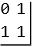
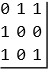
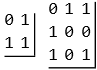

In [19]:
bn3 = butchiNumber[3]
bn5 = butchiNumber[5]
bn3 * bn5

In [22]:
bn3 // FullForm

butchiNumber[List[List[1, 1], List[1, 0]]]

a22 + b22   a12 + b12

a21 + b21   a11 + b11
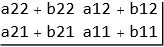

In [25]:
butchiNumber[{
  {a11, a21},
  {a12, a22}
}] + butchiNumber[{
  {b11, b21},
  {b12, b22}
}]

In [ ]:
butchiNumber[{
  {a11, a21},
  {a12, a22}
}] * butchiNumber[{
  {b11, b21},
  {b12, b22}
}]

: 

: 

0         0                          a12 a22             0

                                 2                                    2
0         a12 a22 + a21 a22 + a22    a12 a21 + a11 a22   a11 a12 + a12

a21 a22   a12 a21 + a11 a22          a11 a12 + a11 a21   0

                       2                                    2
0         a11 a21 + a21              0                   a11
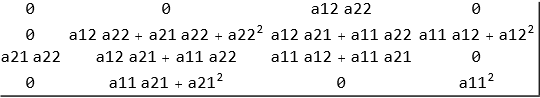

In [ ]:
butchiNumber[{
  {a11, a21},
  {a12, a22}
}]^2

In [ ]:
(* butchiNumber[{
  {a11, a21},
  {a12, a22}
}]^3 *)

In [ ]:
(* butchiNumber[{
  {a11, a21, a31},
  {a12, a22, a32},
  {a13, a23, a33}
}]^2 *)

-Graphics-
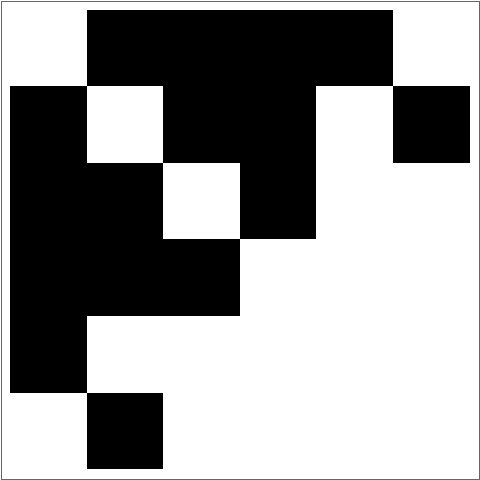

In [ ]:
butchiNumberPlot[butchiNumber[16]]

-Graphics-
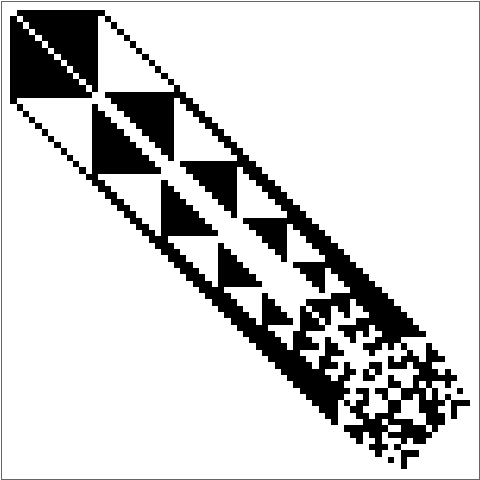

In [ ]:
butchiNumberPlot[butchiNumber[1024]]